In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

crypto_curr = 'BTC'
fiat_curr = "USD"

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

data = web.DataReader(f'{crypto_curr}-{fiat_curr}', 'yahoo', start, end)

In [24]:
#prep data for lstm

print(data.tail())

                    High           Low  ...        Volume     Adj Close
Date                                    ...                            
2021-04-11  61253.035156  59589.875000  ...  5.182869e+10  59893.453125
2021-04-12  63742.285156  59869.957031  ...  6.998345e+10  63503.457031
2021-04-13  64863.097656  61554.796875  ...  7.745178e+10  63109.695312
2021-04-14  63821.671875  62208.964844  ...  6.095438e+10  63314.011719
2021-04-16  63542.328125  60389.738281  ...  8.208225e+10  61651.636719

[5 rows x 6 columns]


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [59]:
prediction_days = 60

In [60]:
future_day = 30

In [61]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data) - future_day):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x+future_day, 0])


In [62]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [39]:
pip install numpy==1.19.5

In [63]:
# create neural network

# pip install numpy==1.19.5


model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
69/69 [==============================] - 11s 83ms/step - loss: 0.0092
Epoch 2/25
69/69 [==============================] - 6s 86ms/step - loss: 0.0030
Epoch 3/25
69/69 [==============================] - 6s 85ms/step - loss: 0.0028
Epoch 4/25
69/69 [==============================] - 6s 85ms/step - loss: 0.0034
Epoch 5/25
69/69 [==============================] - 6s 85ms/step - loss: 0.0029
Epoch 6/25
69/69 [==============================] - 6s 84ms/step - loss: 0.0029
Epoch 7/25
69/69 [==============================] - 6s 86ms/step - loss: 0.0025
Epoch 8/25
69/69 [==============================] - 6s 86ms/step - loss: 0.0025
Epoch 9/25
69/69 [==============================] - 6s 86ms/step - loss: 0.0020
Epoch 10/25
69/69 [==============================] - 6s 86ms/step - loss: 0.0020
Epoch 11/25
69/69 [==============================] - 6s 87ms/step - loss: 0.0019
Epoch 12/25
69/69 [==============================] - 6s 86ms/step - loss: 0.0019
Epoch 13/25
69/69 [=================

In [65]:
#testing the model

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [66]:
test_data = web.DataReader(f'{crypto_curr}-{fiat_curr}', 'yahoo', test_start, test_end)

actual_prices  = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [67]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)



In [68]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

In [69]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

<function matplotlib.pyplot.show>

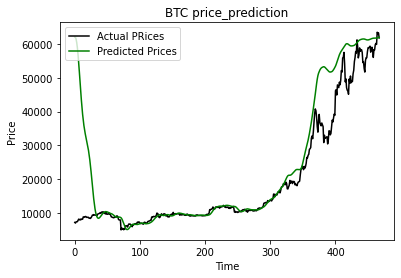

In [71]:
plt.plot(actual_prices, color='black', label = 'Actual PRices')
plt.plot(prediction_prices, color='green', label = 'Predicted Prices')

plt.title(f'{crypto_curr} price_prediction')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend(loc='upper left')
plt.show

In [72]:
future_day

30

In [74]:
# prediction of next day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(prediction)

[[62069.676]]
